In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
from dotenv import dotenv_values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:

# Load database configuration from .env file
config = dotenv_values()
pg_user = config['POSTGRES_USER']
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_pass = config['POSTGRES_PASS']
pg_schema = config['POSTGRES_SCHEMA']

# Create the connection URL
url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'
engine = create_engine(url, echo=False)

query = f"""
    SELECT *           
    FROM "{pg_schema}"."20241113_trainingdata"
"""

# Execute the query and load the result into a DataFrame
with engine.connect() as connection:
    df = pd.read_sql_query(text(query), connection)

# Save the DataFrame to CSV
df.to_csv("20241113_trainingdata.csv", index=False)


query = f"""
    SELECT *           
    FROM "{pg_schema}"."20241113_data_to_predict_2015"
"""

#Execute the query and load the result into a DataFrame
with engine.connect() as connection:
    df = pd.read_sql_query(text(query), connection)

 #Save the DataFrame to CSV
df.to_csv("20241113_data_to_predict_2015.csv", index=False)


<bound method Series.unique of 0         ecosystem
1         ecosystem
2         ecosystem
3         ecosystem
4         ecosystem
            ...    
367833    ecosystem
367834    ecosystem
367835    ecosystem
367836    ecosystem
367837    ecosystem
Name: ecosystem, Length: 367838, dtype: object>

In [ ]:
df = pd.read_csv("20241113_trainingdata.csv")
df = df.dropna()

X = df.drop(columns=["ecosystem", "name"])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["ecosystem"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Modellbewertung:\n", classification_report(y_test, y_pred))

merged_data_to_predict = pd.read_csv('20241113_data_to_predict_2015.csv')
X_new = merged_data_to_predict.drop(columns=["ecosystem", "name"], errors='ignore')

X_new_scaled = scaler.transform(X_new)

y_new_pred = model.predict(X_new_scaled)

ecosystem_pred = label_encoder.inverse_transform(y_new_pred)

merged_data_to_predict['predicted_ecosystem'] = ecosystem_pred

print(merged_data_to_predict[['lat', 'lon', 'predicted_ecosystem']].head())


Modellbewertung:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.86      0.92         7
           3       0.94      1.00      0.97        34
           4       1.00      1.00      1.00       173
           5       1.00      0.97      0.98        33
           6       1.00      1.00      1.00        30
           7       0.89      0.89      0.89        38
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        79
          10       0.71      1.00      0.83        10
          11       0.98      0.98      0.98       120
          12       1.00      0.80      0.89        10
          13       0.79      0.79      0.79        14
          14       0.90      0.91      0.90        66
          15       0.88      0.81      0.84        43

    accuracy                           0.96       713
   macro avg       0.94      0.93      0.93       713
weighted

In [11]:
merged_data_to_predict['predicted_ecosystem'].unique()

array(['Artificial-Agriculture-Fields', 'Natural-Montane-Alpine_tundra',
       'Natural-Grassland-Meadow', 'Natural-Grassland-Steppe',
       'Natural-Forest-Temperate', 'Natural-Desert-Cold',
       'Natural-Montane-Subalpine', 'Natural-Montane-Montane_Forest',
       'Natural-Desert-Hot', 'Natural-Desert-Semi_arid',
       'Natural-Grassland-Savannah', 'Natural-Grassland-Swamp',
       'Natural-Forest-Tropical', 'Artificial-Urban-Buildings',
       'Natural-Forest-Boreal/Taiga'], dtype=object)

In [4]:
# Rückumwandlung der numerischen Vorhersagen in die ursprünglichen Kategorien
ecosystem_pred = label_encoder.inverse_transform(y_new_pred)  # Verwende den gleichen LabelEncoder wie beim Training

# Hinzufügen der Vorhersage als neue Spalte
merged_data_to_predict['predicted_ecosystem'] = ecosystem_pred

# Überprüfen, ob die 'predicted_ecosystem'-Spalte korrekt hinzugefügt wurde
print(merged_data_to_predict.columns)  # Zeigt alle Spalten an
print(merged_data_to_predict[['lat', 'lon', 'predicted_ecosystem']].head(20))  # Zeigt die ersten Zeilen an
merged_data_to_predict = merged_data_to_predict.dropna(subset=['SWdown_min'])


Index(['lat', 'lon', 'elevation', 'elevation_relative', 'ndvi', 'Swnet_min',
       'Swnet_max', 'Swnet_avg', 'Lwnet_min', 'Lwnet_max',
       ...
       'SWdown_min', 'SWdown_max', 'SWdown_avg', 'LWdown_min', 'LWdown_max',
       'LWdown_avg', 'radiance', 'ecosystem', 'name', 'predicted_ecosystem'],
      dtype='object', length=117)
       lat      lon       predicted_ecosystem
0  -88.875 -179.875  Natural-Grassland-Meadow
1  -88.875 -179.625  Natural-Grassland-Meadow
2  -88.875 -179.375  Natural-Grassland-Meadow
3  -88.875 -179.125  Natural-Grassland-Meadow
4  -88.875 -178.875  Natural-Grassland-Meadow
5  -88.875 -178.625  Natural-Grassland-Meadow
6  -88.875 -178.375  Natural-Grassland-Meadow
7  -88.875 -178.125  Natural-Grassland-Meadow
8  -88.875 -177.875  Natural-Grassland-Meadow
9  -88.875 -177.625  Natural-Grassland-Meadow
10 -88.875 -177.375  Natural-Grassland-Meadow
11 -88.875 -177.125  Natural-Grassland-Meadow
12 -88.875 -176.875  Natural-Grassland-Meadow
13 -88.875 -176.625 

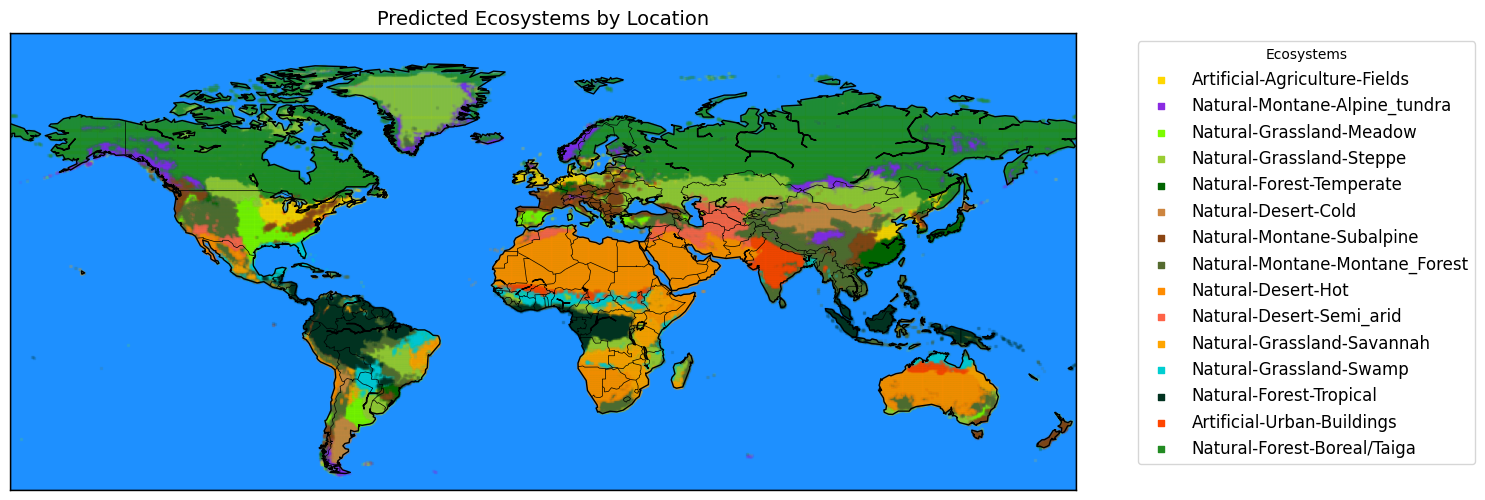

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

# Set up the figure and Basemap for the World
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#1E90FF')  # Light Blue Ocean

# Define custom color palette for each ecosystem based on your predicted categories
ecosystem_color_map = {
    'Artificial-Urban-Buildings': '#FF4500',  # Bright Orange-Red, very visible for urban areas
    'Artificial-Agriculture-Fields': '#FFD700',  # Bright Gold, for farmland
    'Natural-Grassland-Steppe': '#9ACD32',  # Yellow-Green, vibrant for open plains
    'Natural-Forest-Boreal/Taiga': '#228B22',  # Forest Green, saturated for boreal forests
    'Natural-Forest-Temperate': '#006400',  # Dark Green, rich and deep for temperate forests
    'Natural-Desert-Hot': '#FF8C00',  # Vivid Orange, for hot deserts
    'Natural-Desert-Cold': '#CD853F',  # Peru Brown, warm and bold for cold deserts
    'Natural-Grassland-Meadow': '#7CFC00',  # Lawn Green, bright and lively for meadows
    'Natural-Grassland-Savannah': '#FFA500',  # Orange, for sunny savannahs
    'Natural-Grassland-Swamp': '#00CED1',  # Dark Turquoise, bright and wet-looking for swamps
    'Natural-Montane-Montane_Forest': '#556B2F',  # Olive Green, rich and strong for montane forests
    'Natural-Montane-Alpine_tundra': '#8A2BE2',  # Blue Violet, vibrant for high-altitude tundra
    'Natural-Desert-Semi_arid': '#FF6347',  # Tomato Red, vibrant for semi-arid regions
    'Natural-Montane-Subalpine': '#8B4513',   # Saddle Brown, intense for subalpine forests
    'Natural-Forest-Tropical': '#013220',  # Vibrant Dark Green, lush and intense for rainforests   
}


# Erstellen einer Liste von einzigartigen Ökosystemen aus den Vorhersagen
unique_ecosystems = merged_data_to_predict['predicted_ecosystem'].unique()

# Plot each point, colored by predicted ecosystem
scatter_objects = []  # To store scatter objects for the legend
for ecosystem in unique_ecosystems:
    ecosystem_data = merged_data_to_predict[merged_data_to_predict['predicted_ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Get the color for this ecosystem from the predefined color map
    color = ecosystem_color_map.get(ecosystem, '#808080')  # Default to gray if not found
    # Create scatter for this ecosystem with alpha for map points
    m.scatter(x, y, color=color, s=0.53, marker='s', alpha=0.1)
    # Add a scatter object without alpha and larger size for the legend
    scatter = plt.scatter([], [], color=color, s=20, marker='s', label=ecosystem)
    scatter_objects.append(scatter)  # Store scatter object for legend

# Add a title
plt.title("Predicted Ecosystems by Location", fontsize=14)

# Add a legend for the ecosystems with larger markers and no transparency
plt.legend(handles=scatter_objects, title="Ecosystems", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, frameon=True)
# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()

x, xend, y, yend. pixel-gridsresolution/2

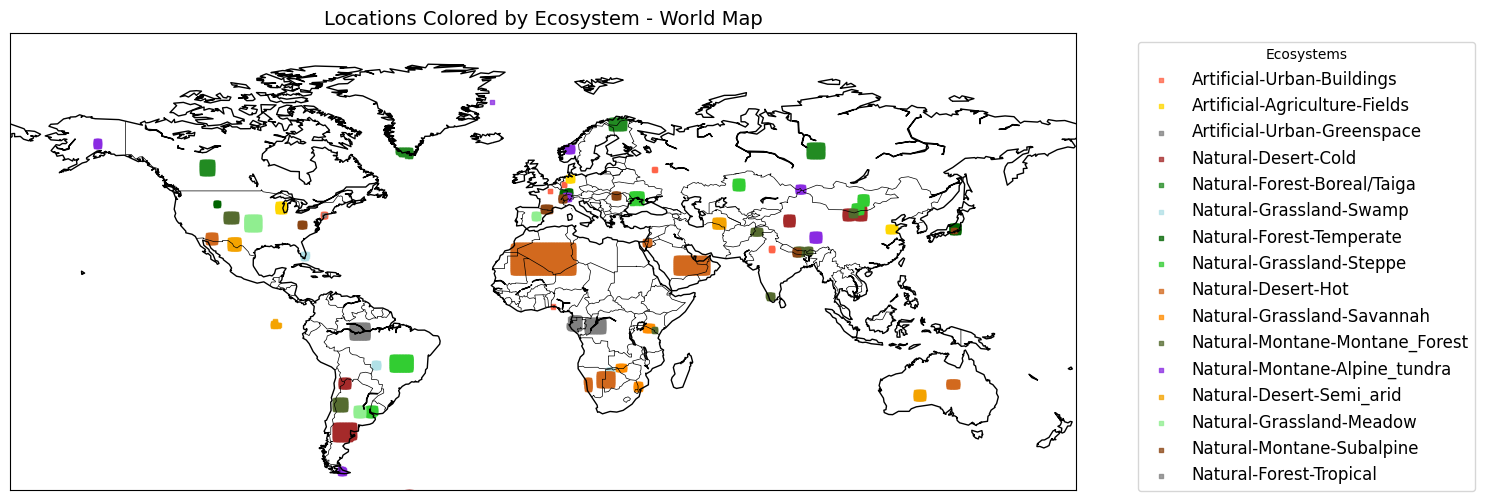

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the data
df = pd.read_csv('20241113_trainingdata.csv')

# Set up the figure and Basemap for the World
plt.figure(figsize=(15, 10))
m_projection = "gall"  # Gall-Peters projection
m = Basemap(projection=m_projection, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Define custom color palette for each ecosystem based on your provided list
ecosystem_color_map = {
    'Artificial-Urban-Buildings': '#FF6347',  # Red
    'Artificial-Agriculture-Fields': '#FFD700',  # Gold
    'Natural-Grassland-Steppe': '#32CD32',  # Lime Green
    'Natural-Forest-Boreal/Taiga': '#228B22',  # Forest Green
    'Natural-Forest-Temperate': '#006400',  # Dark Green
    'Natural-Desert-Hot': '#D2691E',  # Chocolate Brown
    'Natural-Desert-Cold': '#A52A2A',  # Brown
    'Natural-Grassland-Meadow': '#90EE90',  # Light Green
    'Natural-Grassland-Savannah': '#FF8C00',  # Dark Orange
    'Natural-Grassland-Swamp': '#B0E0E6',  # Powder Blue
    'Natural-Montane-Montane_Forest': '#556B2F',  # Dark Olive Green
    'Natural-Montane-Alpine_tundra': '#8A2BE2',  # Blue Violet
    'Natural-Desert-Semi_arid': '#F4A300',  # Orange Yellow
    'Natural-Montane-Subalpine': '#8B4513'   # Saddle Brown
}

# Create a list of unique ecosystems from the dataframe
unique_ecosystems = df['ecosystem'].unique()

# Plot each point, colored by ecosystem
scatter_objects = []  # To store scatter objects for the legend
for ecosystem in unique_ecosystems:
    ecosystem_data = df[df['ecosystem'] == ecosystem]
    x, y = m(ecosystem_data['lon'].values, ecosystem_data['lat'].values)
    # Get the color for this ecosystem from the predefined color map
    color = ecosystem_color_map.get(ecosystem, '#808080')  # Default to gray if not found
    # Create scatter for this ecosystem and add it to the legend
    scatter = m.scatter(x, y, color=color, s=10, marker='s', alpha=0.75, label=ecosystem)
    scatter_objects.append(scatter)  # Store scatter object for later use in legend

# Add a title
plt.title("Locations Colored by Ecosystem - World Map", fontsize=14)

# Add a legend for the ecosystems
plt.legend(handles=scatter_objects, title="Ecosystems", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure the map fits well
plt.show()

# **Heatmap**

Correlation Matrix:
                         lat       lon  elevation  elevation_relative  \
lat                 1.000000 -0.017820  -0.454227           -0.285481   
lon                -0.017820  1.000000   0.052000            0.042974   
elevation          -0.454227  0.052000   1.000000            0.620793   
elevation_relative -0.285481  0.042974   0.620793            1.000000   
ndvi               -0.448260 -0.011081  -0.221065           -0.138166   
...                      ...       ...        ...                 ...   
SWdown_avg         -0.787960  0.068134   0.155799            0.194882   
LWdown_min         -0.818080 -0.019206  -0.153891           -0.077027   
LWdown_max         -0.634862  0.153651  -0.404260           -0.176624   
LWdown_avg         -0.788502  0.027517  -0.248060           -0.110323   
radiance            0.046328 -0.027181  -0.071128           -0.061369   

                        ndvi  Swnet_min  Swnet_max  Swnet_avg  Lwnet_min  \
lat                -0.44826

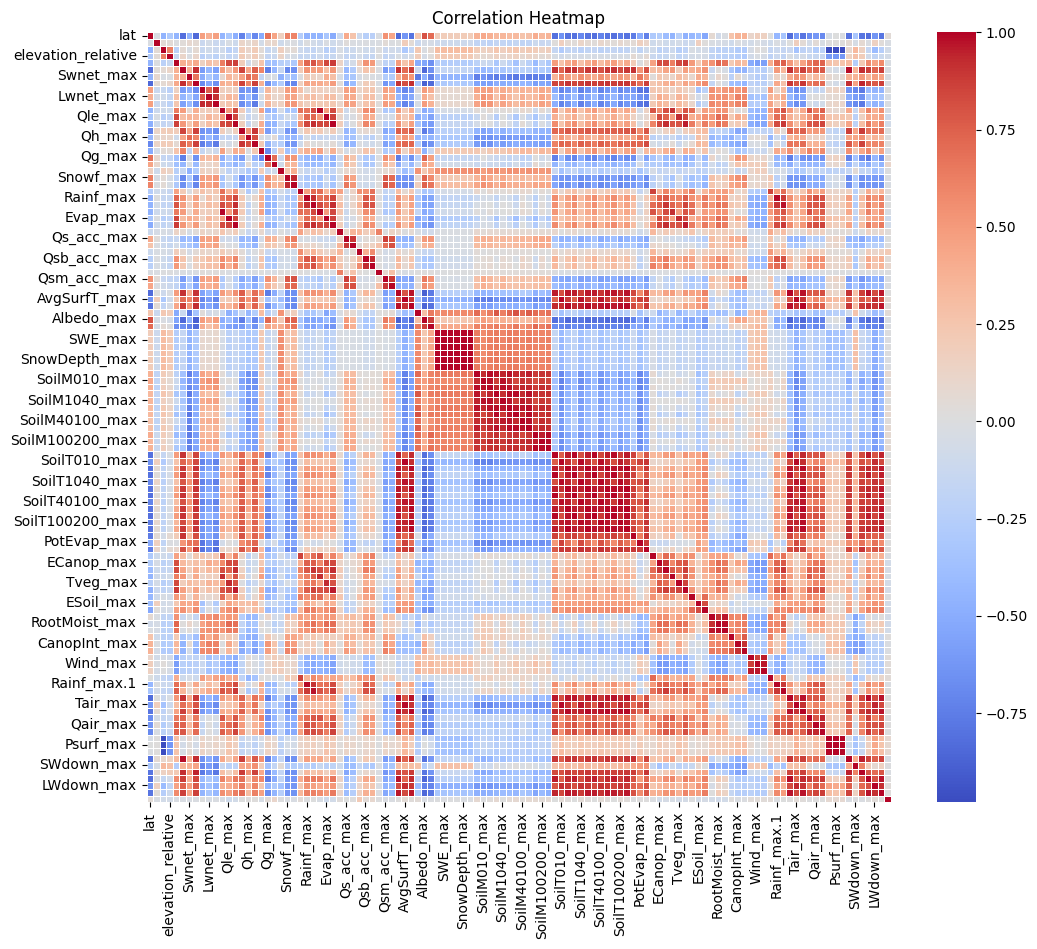

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('20241113_data_to_predict_2015.csv')

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
